In [22]:
import pandas as pd
import numpy as np
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [23]:
#for visualization
import matplotlib.pyplot as plt
import plotly.graph_objects  as go
import plotly.express as px
import plotly.offline as py
import seaborn as sns
import gc
import warnings
warnings.filterwarnings("ignore")

In [24]:
df1= pd.read_csv("country_wise_latest.csv")

In [4]:
df1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
#To see the statistical details of the dataset
df1.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


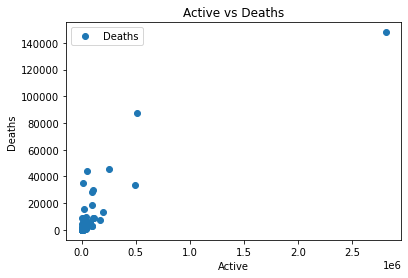

In [27]:
#plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data using the below script
df1.plot(x='Active', y='Deaths', style='o')  
plt.title('Active vs Deaths')  
plt.xlabel('Active')  
plt.ylabel('Deaths')  
plt.show()

In [28]:
# the data into “attributes” and “labels”.
#Attributes are the independent variables while labels are dependent variables whose values are to be predicted
X = df1['Active'].values.reshape(-1,1)
y = df1['Deaths'].values.reshape(-1,1)

In [29]:
#we split 20% of the data to the training set while 80% of the data to test set using below code.
#The test_size variable is where we actually specify the proportion of the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [30]:
#to train our algorithm. For that, we need to import LinearRegression class
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [31]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[767.78373903]
[[0.06749028]]


In [32]:
#we will use our test data and see how accurately our algorithm predicts 
y_pred = regressor.predict(X_test)

In [33]:
#compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,124,799.909113
1,19,780.539402
2,720,1089.374935
3,8,784.791290
4,108,824.408086
...,...,...
145,408,1230.024684
146,28432,7085.751550
147,5842,2618.434774
148,75,770.280879


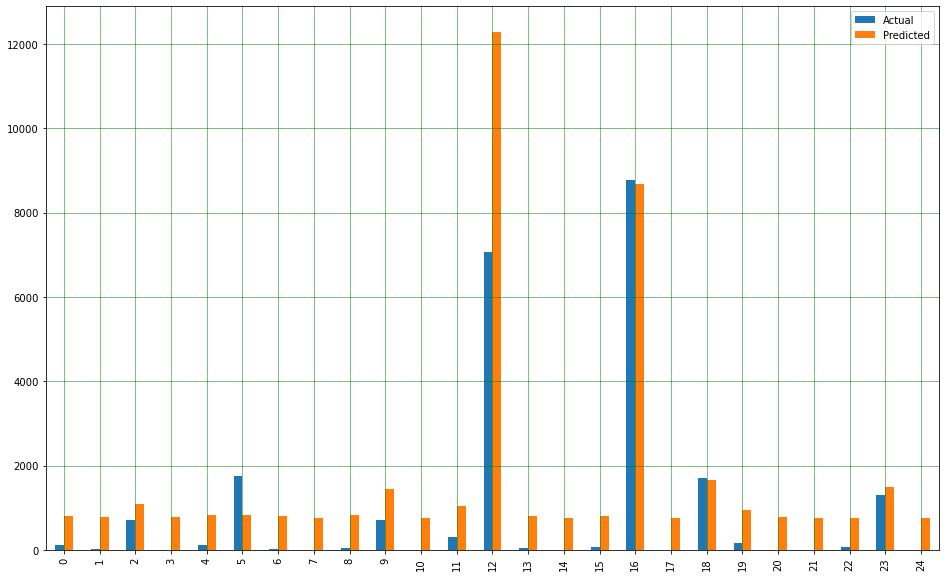

In [34]:
#visualize comparison result as a bar graph
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()